#Dimensionality Reduction on Tabular data

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Load the iris data

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#Apply PCA

In [3]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X)

In [4]:
covariance_matrix = np.cov(transformed_df.T)

In [5]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


Eigen Values

In [6]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigen values arranged in descending order:')
for i in eigen_pairs:
    print(i[0])


Eigenvalues arranged in descending order:
2.9380850501999918
0.9201649041624865
0.14774182104494768
0.02085386217646253


In [7]:
pca = PCA()


In [8]:
pca = pca.fit(transformed_df)

In [9]:
explained_variance = pca.explained_variance_ratio_

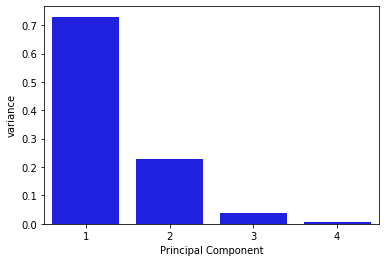

In [10]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':[i+1 for i in range(4)]})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

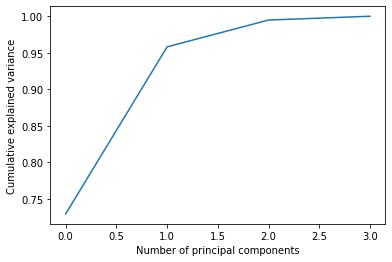

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [12]:
pca_2 = PCA(n_components =4)
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X)

#Below Plot indicates the data is clearly distributed

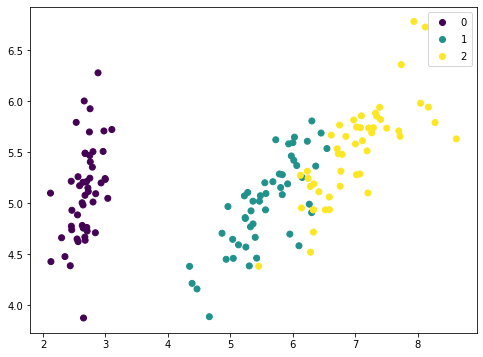

In [13]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(pca_2d[:,0], pca_2d[:,1],c=y)
plt.legend(*scatter.legend_elements())

#SVD

In [14]:
u, s, v = np.linalg.svd(X, full_matrices=True)

In [15]:
u.shape


(150, 150)

In [16]:
s.shape

(4,)

In [17]:
v.shape

(4, 4)

Text(0, 0.5, 'Percent of the variance explained')

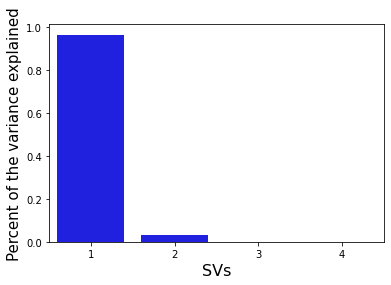

In [18]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained[:10])+1)),
            y=variance_explained[:10], color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [19]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=y.tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,0,-0.061617,0.129611
1,0,-0.058071,0.111020
2,0,-0.056763,0.117966
3,0,-0.056653,0.105308
4,0,-0.061230,0.131090



#After application of dimensionality reduction, the graph is  plotting the data distribution clearly.

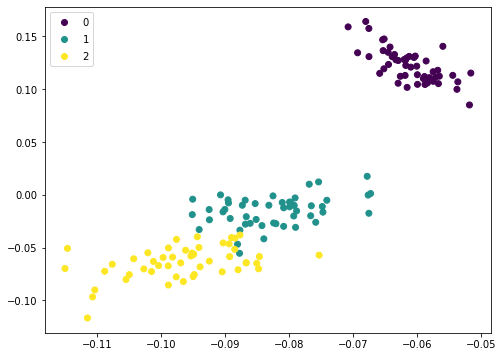

In [20]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(svd_df['SV1'],svd_df['SV2'],c=svd_df['Class'])
plt.legend(*scatter.legend_elements())

#TSNE

In [21]:
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.667454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.117310
[t-SNE] KL divergence after 300 iterations: 2.423518


#Projection of data is not clear with TSNE

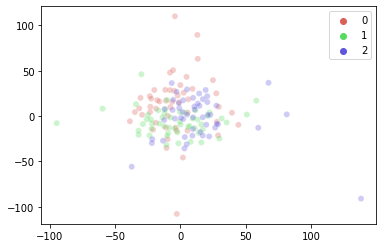

In [22]:
tsne_1 = tsne_results[:,0]
tsne_2 = tsne_results[:,1]
#plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_1, y=tsne_2,
    hue=y,
    palette=sns.color_palette("hls", 3),
    data=X,
    legend="full",
    alpha=0.3
)


#ISOMAP

In [23]:
from sklearn import manifold, datasets

In [24]:
iris = datasets.load_iris()
isomap = manifold.Isomap(n_components=2)
new_dim = isomap.fit_transform(iris.data)

In [25]:
df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df['label'] = iris.target
df.head()

,X,Y,label
0,0.118155,0.381038,0
1,0.113729,0.323243,0
2,0.113922,0.325955,0
3,0.113904,0.325207,0
4,0.117613,0.372992,0


#ISOMAP also distrubuted the data but not good with all features

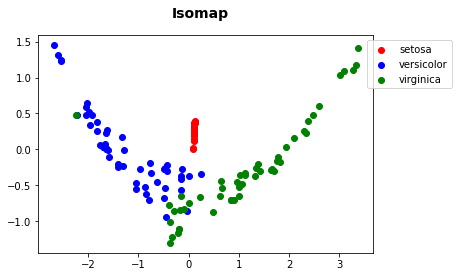

In [26]:
fig = plt.figure()
fig.suptitle('Isomap', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

plt.scatter(df[df.label == 0].X, df[df.label == 0].Y, color='red', label=iris.target_names[0])
plt.scatter(df[df.label == 1].X, df[df.label == 1].Y, color='blue', label=iris.target_names[1])
plt.scatter(df[df.label == 2].X, df[df.label == 2].Y, color='green', label=iris.target_names[2])

plt.legend(bbox_to_anchor=(1.25, 1))

#LLE

In [27]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)

In [28]:
X_transformed = embedding.fit_transform(X)

#Data distribution not clear with LLE technique

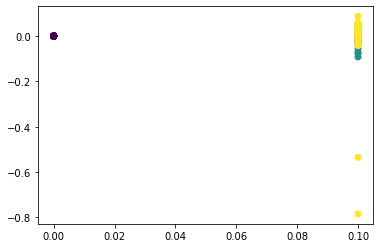

In [29]:
scatter = plt.scatter(X_transformed.T[0], X_transformed.T[1],c=y)

#UMAP

In [30]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 38.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=a7f2f4c61de352c8876a84573a94375c18077018bb49a9f4e733d444f9613d3f
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=91994f7493a9e271c5d30b84c44c5c93379ce09a46cf2c28646c7c4352b88fcd
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [31]:

import umap
import time
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(X)
print('Duration: {} seconds'.format(time.time() - start))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Duration: 8.914960384368896 seconds


In [32]:
mapper = umap.UMAP().fit(X)

In [33]:
!pip install "umap-learn[plot]"
import colorcet
import holoviews as hv
import sklearn.decomposition
import umap.plot


     |████████████████████████████████| 15.8 MB 612 bytes/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 125 kB 60.2 MB/s 
     |████████████████████████████████| 791 kB 50.8 MB/s 
     |████████████████████████████████| 786 kB 29.4 MB/s 
     |████████████████████████████████| 779 kB 65.9 MB/s 
     |████████████████████████████████| 778 kB 57.7 MB/s 
     |████████████████████████████████| 776 kB 54.0 MB/s 
     |████████████████████████████████| 769 kB 51.2 MB/s 
     |████████████████████████████████| 766 kB 41.5 MB/s 
     |████████████████████████████████| 1.0 MB 51.2 MB/s 
     |████████████████████████████████| 722 kB 36.1 MB/s 
     |████████████████████████████████| 722 kB 64.2 MB/s 
     |████████████████████████████████| 715 kB 57.6 MB/s 
     |████████████████████████████████| 705 kB 44.6 MB/s 
     |████████████████████████████████| 699 kB 53.4 MB/s 
     |████████████████████████████████| 696 kB 52.2 MB/s 
     |███████

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


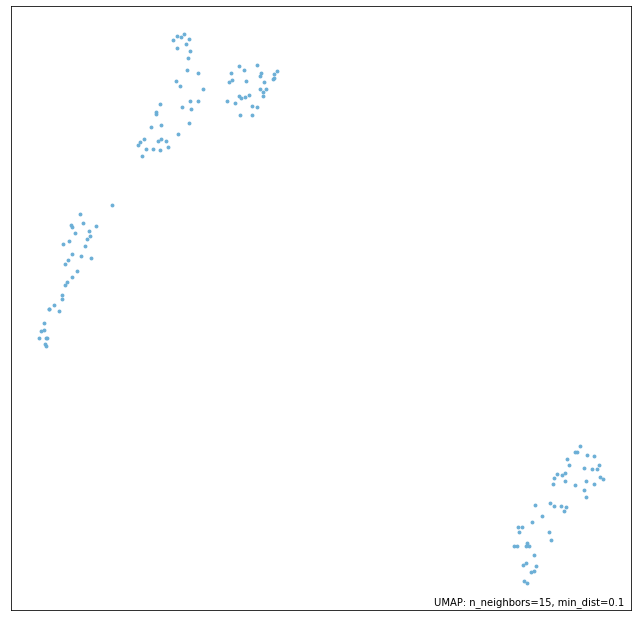

In [34]:
umap.plot.points(mapper)


#Data projection with UMAP is clear

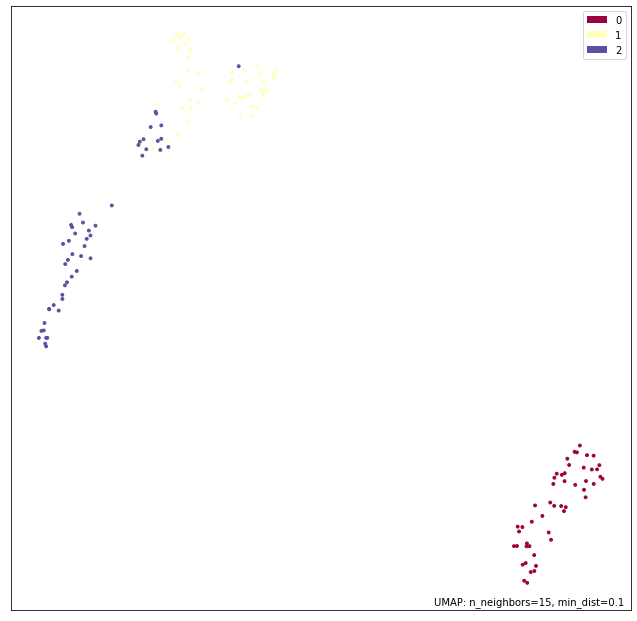

In [35]:
umap.plot.points(mapper, labels=y)

#Conclusion : PCA, SVD, ISOMAP, UMAP project the Data clearly but LLE and TSNE did not do perform well with tabular data.